# 시계열 모델들

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, LSTM, GRU

## SimpleRNN

In [3]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [4]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10), return_sequences=True))
model.add(SimpleRNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 2, 3)              42        
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 3)                 21        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


## Bidirectional_RNN

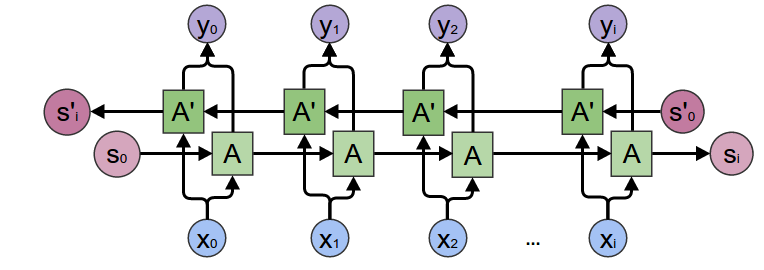

In [7]:
from IPython.display import Image
Image('./data/bidirectional_rnn.png')

In [6]:
model = Sequential()
model.add(Bidirectional(SimpleRNN(3, return_sequences=True),input_shape=(2,10)))
model.add(Bidirectional(SimpleRNN(3)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_2 (Bidirectio  (None, 2, 6)             84        
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 6)                60        
 nal)                                                            
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [8]:
model = Sequential()
model.add(LSTM(3, input_shape=(2,10)))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3)                 168       
                                                                 
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


## GRU

In [9]:
# GRU
model = Sequential()
model.add(GRU(3, input_shape=(2,10)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3)                 135       
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


# reuter news text classification

In [17]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 데이터파악

In [11]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(test_split=0.2)

In [13]:
print(x_train.shape)

(8982,)


In [14]:
print(x_test.shape)

(2246,)


In [16]:
len(x_train[0])

87

In [18]:
# 가장 길이가 긴 기사
max([len(l) for l in x_train])

2376

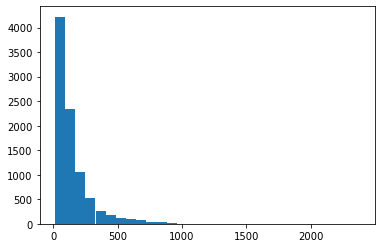

In [23]:
# 분포 시각화
plt.hist([len(l) for l in x_train], bins= 30)
plt.show()

In [24]:
pd.Series(y_train).value_counts()

3     3159
4     1949
19     549
16     444
1      432
11     390
20     269
13     172
8      139
10     124
9      101
21     100
25      92
2       74
18      66
24      62
0       55
34      50
12      49
36      49
28      48
6       48
30      45
23      41
31      39
17      39
40      36
32      32
41      30
14      26
39      24
26      24
43      21
15      20
37      19
38      19
29      19
45      18
5       17
7       16
27      15
22      15
42      13
44      12
33      11
35      10
dtype: int64

In [25]:
max(y_train)

45

In [43]:
reuters.get_word_index()

{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [44]:
word_to_index = reuters.get_word_index()

In [45]:
index_to_word = {}
for word ,idx in word_to_index.items():
    index_to_word[idx] = word

index_to_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [46]:
index_to_word[0]

KeyError: 0

In [47]:
index_to_word[1]

'the'

In [48]:
index_to_word[2]

'of'

In [50]:
# 딥러닝 처리 문장의 시작0, 문장 길이1 , 알수없는 단어2 다
for index, token in enumerate(('<pad>', '<sos>', '<unk>')):  # sos : start of sentence
    index_to_word[index] = token

In [51]:
print(x_train[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [52]:
' '.join([index_to_word[idx] for idx in x_train[0]])

'<sos> <unk> <unk> mln loss for plc said at only ended said <unk> could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 <unk> <unk> several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed <unk> april 0 are 2 states will billion total and against 000 pct dlrs'

In [53]:
index_to_word[0]

'<pad>'

## 딥러닝 : LSTM(categorical)

In [172]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Embedding,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [173]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=2000, test_split=0.2)

In [174]:
x_train.shape

(8982,)

In [175]:
# 최대 길이 정해주기
max_len = 100
x_train = pad_sequences(x_train, maxlen= max_len)
x_test = pad_sequences(x_test, maxlen= max_len)

In [176]:
x_train[60]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    1,   56,  735,  268,  626,
         71,    8,   16,   41,    2,   25,  866,    6,  438,   56,    2,
        149,    2,  310,    7,  125,    2,  324,    2,  149,   13, 1045,
         11,   15,   31, 1074,  133,   91,  272,  735,  268,  626,  152,
         24,    4,  584,   96,  114,   30,  478,  290,    2,   21,   42,
          2,  690, 1269, 1593,   22,   10,  384,  257, 1397,  435, 1629,
         27,  735,  268,  626,    2,    2,  267,    2,   23,   10,    2,
        362,   49,   31,  220,    7,    4,   37,   38,    9,  392,   17,
         12])

In [177]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

In [178]:
# 카테고리 벡터화 시키기
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [179]:
y_train.shape

(8982, 46)

In [180]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [181]:
x_train.shape

(8982, 100)

In [182]:
x_test.shape

(2246, 100)

In [183]:
import tensorflow as tf

In [196]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Embedding(1000,120,input_length=100))  # 토큰의 가지수 1000개 (num_words=1000)를 120차원의 벡터로 바꿈
    model.add(LSTM(240,return_sequences=True))
    model.add(LSTM(120))
    model.add(Dropout(0.2))
    model.add(Dense(80))
    model.add(Dense(46, activation='softmax'))

In [197]:
es = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./data/best_model.h5', monitor='val_acc', mode='max', verbose=1 , save_best_only=True)

In [198]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [199]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=50, callbacks=[es,mc], validation_data=(x_test,y_test))

Epoch 1/50
71/71 [==============================] - 4s 33ms/step - loss: 2.2893 - accuracy: 0.4144 - val_loss: 1.8655 - val_accuracy: 0.4942
Epoch 2/50
71/71 [==============================] - 2s 26ms/step - loss: 1.7431 - accuracy: 0.5387 - val_loss: 1.7441 - val_accuracy: 0.5628
Epoch 3/50
71/71 [==============================] - 2s 25ms/step - loss: 1.5607 - accuracy: 0.5954 - val_loss: 1.5826 - val_accuracy: 0.5859
Epoch 4/50
71/71 [==============================] - 2s 25ms/step - loss: 1.4103 - accuracy: 0.6357 - val_loss: 1.4613 - val_accuracy: 0.6269
Epoch 5/50
71/71 [==============================] - 2s 25ms/step - loss: 1.2722 - accuracy: 0.6703 - val_loss: 1.4434 - val_accuracy: 0.6420
Epoch 6/50
71/71 [==============================] - 2s 26ms/step - loss: 1.2331 - accuracy: 0.6802 - val_loss: 1.4041 - val_accuracy: 0.6420
Epoch 7/50
71/71 [==============================] - 2s 26ms/step - loss: 1.2037 - accuracy: 0.6908 - val_loss: 1.3803 - val_accuracy: 0.6581
Epoch 8/50
71

In [372]:
# loaded_model = load_model('./data/best_model.h5')

# IMDB 

In [200]:
from tensorflow.keras.datasets import imdb

In [201]:
(x_train, y_train), (x_test,y_test) = imdb.load_data()

In [202]:
x_train.shape

(25000,)

In [204]:
y_train.shape

(25000,)

In [205]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [209]:
#binary 형식
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

## 딥러닝: LSTM(binary)

In [218]:
(x_train, y_train), (x_test,y_test) = imdb.load_data(num_words=1000 )

In [219]:
# 문장 길이 통일시키기
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [214]:
# y값 

In [220]:
# 데이터 형태 파악하기
x_train.shape

(25000, 100)

In [221]:
x_test.shape

(25000, 100)

In [222]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [226]:
# 모델 생성
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Embedding(1000,120,input_length=100))  # 토큰의 가지수 1000개 (num_words=1000)를 120차원의 벡터로 바꿈
    model.add(LSTM(120,return_sequences=True))
    model.add(LSTM(60))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(15,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

In [227]:
es = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./data/best_model.h5', monitor='val_acc', mode='max', verbose=1 , save_best_only=True)

In [228]:
model.compile(loss='binary_crossentropy', metrics=['acc'], optimizer = 'adam')

In [231]:
hist = model.fit(x_train,y_train, epochs=30, validation_data= (x_test,y_test), callbacks=[es,mc])

Epoch 1/30
782/782 [==============================] - ETA: 0s - loss: 0.5124 - acc: 0.7402
Epoch 1: val_acc improved from -inf to 0.81388, saving model to ./data\best_model.h5
782/782 [==============================] - 17s 20ms/step - loss: 0.5124 - acc: 0.7402 - val_loss: 0.4035 - val_acc: 0.8139
Epoch 2/30
782/782 [==============================] - ETA: 0s - loss: 0.3948 - acc: 0.8226
Epoch 2: val_acc did not improve from 0.81388
782/782 [==============================] - 15s 19ms/step - loss: 0.3948 - acc: 0.8226 - val_loss: 0.4346 - val_acc: 0.7976
Epoch 3/30
779/782 [============================>.] - ETA: 0s - loss: 0.3688 - acc: 0.8392
Epoch 3: val_acc improved from 0.81388 to 0.82388, saving model to ./data\best_model.h5
782/782 [==============================] - 15s 19ms/step - loss: 0.3685 - acc: 0.8394 - val_loss: 0.3717 - val_acc: 0.8239
Epoch 4/30
779/782 [============================>.] - ETA: 0s - loss: 0.3375 - acc: 0.8538
Epoch 4: val_acc improved from 0.82388 to 0.8406

In [232]:
loaded_model = load_model('./data/best_model.h5')

In [233]:
loaded_model.evaluate(x_test, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 0.3464 - acc: 0.8464


[0.34644144773483276, 0.8464000225067139]

# 네이버 영화 댓글

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from konlpy.tag import Okt,Komoran, Kkma,Hannanum

okt = Okt()
kom = Komoran()
kkma = Kkma()
han = Hannanum()

In [7]:
train_df = pd.read_csv('./data/ratings_train.txt', sep='\t')
test_df = pd.read_csv('./data/ratings_test.txt', sep='\t')

In [8]:
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 전처리

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [10]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [11]:
train_df.duplicated(subset=['document']).sum()

3813

In [12]:
train_df.drop_duplicates(['document'],keep='first', inplace=True)
test_df.drop_duplicates(['document'],keep='first', inplace= True)

In [13]:
train_df.duplicated(subset=['document']).sum()

0

In [14]:
train_df.label.value_counts()

0    73342
1    72840
Name: label, dtype: int64

In [15]:
# document_clean 새로운 열 생성

#### 한글 공백만 남기기 + 빈값제거

In [16]:
train_df['document_clean'] = train_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]", '',regex=True)
test_df['document_clean'] = test_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]", '',regex=True)

In [17]:
# 공백제거
train_df['document_clean'] = train_df['document_clean'].str.replace('\s+',' ',regex=True) 
test_df['document_clean'] = test_df['document_clean'].str.replace('\s+',' ',regex=True) 

In [18]:
# train 빈값 확인
train_df[train_df['document_clean']== '']

,id,document,label,document_clean
584,7117896,1,0,
593,6478189,4,0,
638,9364602,4.444.444.444.444.44,0,
1840,7095375,♥♥♥,1,
2327,9317820,1236547890,1,
...,...,...,...,...
144713,5887409,それからいつでも頑張らなきゃ。,1,
146064,8014067,181818,0,
146607,4602734,2,0,
147059,7089618,......,1,


In [19]:
# train,test 빈값제거
train_df = train_df[train_df['document_clean'] != '']
train_df = train_df[train_df['document_clean'] != ' ']

test_df = test_df[test_df['document_clean'] != '']
test_df = test_df[test_df['document_clean'] != ' ']

In [20]:
# 빈값 확인
train_df[train_df['document_clean']== ' ']

,id,document,label,document_clean


#### 토큰화 + 불용어 제거

In [21]:
st_df = pd.read_csv('./data/stopwords-ko.txt',header = None)
st_list = st_df[0].tolist()
st_list

['가',
 '가까스로',
 '가령',
 '각',
 '각각',
 '각자',
 '각종',
 '갖고말하자면',
 '같다',
 '같이',
 '개의치않고',
 '거니와',
 '거바',
 '거의',
 '것',
 '것과 같이',
 '것들',
 '게다가',
 '게우다',
 '겨우',
 '견지에서',
 '결과에 이르다',
 '결국',
 '결론을 낼 수 있다',
 '겸사겸사',
 '고려하면',
 '고로',
 '곧',
 '공동으로',
 '과',
 '과연',
 '관계가 있다',
 '관계없이',
 '관련이 있다',
 '관하여',
 '관한',
 '관해서는',
 '구',
 '구체적으로',
 '구토하다',
 '그',
 '그들',
 '그때',
 '그래',
 '그래도',
 '그래서',
 '그러나',
 '그러니',
 '그러니까',
 '그러면',
 '그러므로',
 '그러한즉',
 '그런 까닭에',
 '그런데',
 '그런즉',
 '그럼',
 '그럼에도 불구하고',
 '그렇게 함으로써',
 '그렇지',
 '그렇지 않다면',
 '그렇지 않으면',
 '그렇지만',
 '그렇지않으면',
 '그리고',
 '그리하여',
 '그만이다',
 '그에 따르는',
 '그위에',
 '그저',
 '그중에서',
 '그치지 않다',
 '근거로',
 '근거하여',
 '기대여',
 '기점으로',
 '기준으로',
 '기타',
 '까닭으로',
 '까악',
 '까지',
 '까지 미치다',
 '까지도',
 '꽈당',
 '끙끙',
 '끼익',
 '나',
 '나머지는',
 '남들',
 '남짓',
 '너',
 '너희',
 '너희들',
 '네',
 '넷',
 '년',
 '논하지 않다',
 '놀라다',
 '누가 알겠는가',
 '누구',
 '다른',
 '다른 방면으로',
 '다만',
 '다섯',
 '다소',
 '다수',
 '다시 말하자면',
 '다시말하면',
 '다음',
 '다음에',
 '다음으로',
 '단지',
 '답다',
 '당신',
 '당장',
 '대로 하다',
 '대하면',
 '대하여',
 '대해 말하자면',
 '대해서',
 '댕그',


In [22]:
def remove_stwords_oneletter(doc):
    doc = kom.morphs(doc)
    doc = [t for t in doc if t not in st_list]
    doc = [t for t in doc if len(t)>1]
    doc = ' '.join(doc)
    return doc

In [23]:
# document_clean_stop 새로운 열 생성 : stopwords제외 + 한글자 이상인 토큰만

train_df['document_clean_stop'] = train_df['document_clean'].apply(remove_stwords_oneletter)
test_df['document_clean_stop'] = test_df['document_clean'].apply(remove_stwords_oneletter)

In [24]:
train_df

,id,document,label,document_clean,document_clean_stop
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리,더빙 진짜 짜증 네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,포스터 보고 초딩 영화 오버 연기 가볍 구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너무재밓었다그래서보는것을추천한다,너무재밓었다그래서보는것을추천한다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기구먼 솔직히 재미는 없다평점 조정,교도소 이야기 구먼 솔직히 재미 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,사이몬페그의 익살 스럽 연기 돋보이 영화 스파이더맨 보이 커스틴 던스트 너무나 이뻐보였다
...,...,...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,인간이 문제지 소는 뭔죄인가,인간 문제 ㄴ가
149996,8549745,평점이 너무 낮아서...,1,평점이 너무 낮아서,평점 너무 아서
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다,한국인 거들먹거리 필리핀 혼혈 착하
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,청춘 영화의 최고봉방황과 우울했던 날들의 자화상,청춘 영화 최고봉 방황 우울 자화상


In [25]:
# 빈값제거

In [26]:
train_df[train_df['document_clean_stop']== '']

,id,document,label,document_clean,document_clean_stop
72,5679106,졸작,0,졸작,
151,7348295,아,0,아,
159,7781028,10점,1,점,
285,9056760,또 보고 또 울.었.다..,1,또 보고 또 울었다,
287,6081437,굳굳,1,굳굳,
...,...,...,...,...,...
149419,6710238,잘 보고 있습니다.,1,잘 보고 있습니다,
149570,5744152,1점대찍자,0,점대찍자,
149578,3888842,1점도 많다..,0,점도 많다,
149883,8423027,짱!!!!♥♥♥♥ 강추강추,1,짱 강추강추,


In [27]:
train_df = train_df[train_df['document_clean_stop'] != '']
test_df = test_df[test_df['document_clean_stop'] != '']

In [28]:
# 제거 확인
train_df[train_df['document_clean_stop']== '']

,id,document,label,document_clean,document_clean_stop


## 정수 인코딩

In [29]:
import re 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
tokenizer = Tokenizer() # Tokenizer은 사전에 있는 단어의 순서에 맞게 단어를 turning하면서 말뭉치를 벡터화시킨다
tokenizer.fit_on_texts(train_df['document_clean_stop'])  #fit_on_texts() 메서드는 문자 데이터를 입력받아서 리스트의 형태로 변환

In [31]:
tokenizer.word_index  #tokenizer의 word_index 속성은 단어와 숫자의 키-값 쌍을 포함하는 딕셔너리를 반환

{'영화': 1,
 '는데': 2,
 '너무': 3,
 '정말': 4,
 'ㄴ다': 5,
 '진짜': 6,
 '재밌': 7,
 '어요': 8,
 '만들': 9,
 '아서': 10,
 '네요': 11,
 '연기': 12,
 '나오': 13,
 '평점': 14,
 'ㅂ니다': 15,
 '최고': 16,
 '스토리': 17,
 '생각': 18,
 '드라마': 19,
 '사람': 20,
 '배우': 21,
 '보다': 22,
 '감동': 23,
 '어서': 24,
 '아깝': 25,
 '내용': 26,
 '감독': 27,
 '그냥': 28,
 '재미있': 29,
 '재미': 30,
 '지루': 31,
 '아도': 32,
 '이렇': 33,
 '쓰레기': 34,
 '재미없': 35,
 'ㄴ데': 36,
 '라고': 37,
 'ㄴ가': 38,
 '다시': 39,
 '못하': 40,
 '면서': 41,
 '작품': 42,
 '모르': 43,
 '사랑': 44,
 '보이': 45,
 '마지막': 46,
 '액션': 47,
 '다고': 48,
 '으면': 49,
 '이건': 50,
 '기대': 51,
 '스럽': 52,
 '다는': 53,
 '장면': 54,
 '완전': 55,
 '느끼': 56,
 '처음': 57,
 '라는': 58,
 '지금': 59,
 '정도': 60,
 '그렇': 61,
 '느낌': 62,
 '이야기': 63,
 '다가': 64,
 'ㅋㅋ': 65,
 '최악': 66,
 '좋아하': 67,
 '명작': 68,
 '이해': 69,
 '많이': 70,
 '별로': 71,
 '아요': 72,
 '역시': 73,
 '한국': 74,
 '주인공': 75,
 '여자': 76,
 '는지': 77,
 '연출': 78,
 '이나': 79,
 '이영화': 80,
 '괜찮': 81,
 '때문': 82,
 '대하': 83,
 '버리': 84,
 '기억': 85,
 '보고': 86,
 'ㄴ지': 87,
 '어야': 88,
 'ㄹ까': 89,
 '없이': 90,
 '결말': 9

In [32]:
tokenizer.word_counts.items()

odict_items([('더빙', 561), ('진짜', 7922), ('짜증', 1435), ('네요', 7360), ('목소리', 360), ('포스터', 567), ('보고', 1589), ('초딩', 403), ('영화', 53429), ('오버', 135), ('연기', 7029), ('가볍', 356), ('구나', 728), ('너무재밓었다그래서보는것을추천한다', 1), ('교도소', 17), ('이야기', 2154), ('구먼', 40), ('솔직히', 1060), ('재미', 3613), ('평점', 6098), ('조정', 37), ('사이몬페그의', 1), ('익살', 11), ('스럽', 2466), ('돋보이', 289), ('스파이더맨', 61), ('보이', 2787), ('커스틴', 2), ('던스트', 2), ('너무나', 706), ('이뻐보였다', 1), ('걸음마', 2), ('초등학교', 112), ('학년', 136), ('살용영홬ㅋㅋ별반개도', 1), ('아깝', 4177), ('원작', 1309), ('긴장감', 816), ('제대로', 784), ('살리', 503), ('못하', 2981), ('반개', 182), ('나오', 6426), ('ㄴ다', 7997), ('이응경', 8), ('길용우', 4), ('생활', 127), ('인지', 543), ('정말', 9481), ('발로', 42), ('아도', 3482), ('그것', 844), ('보다', 4822), ('낫겟다', 2), ('납치', 48), ('감금', 11), ('반복', 153), ('드라마', 4991), ('가족', 1025), ('사람', 4886), ('모이', 87), ('액션', 2647), ('는데', 11221), ('ㄴ데', 3256), ('헐리우드', 150), ('화려', 373), ('너무', 10595), ('길들이', 20), ('걍인피니트가짱이다진짜짱이다', 1), ('마다', 670), ('눈물', 1259),

In [33]:
# 등장 빈도수가 3회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 3
total_freq = 0
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
rare_freq = 0

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key,value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    
    # 단어의 등장 빈도수가 threshold보다 작으면
    if (value < threshold):
        rare_cnt = rare_cnt +1  # 0번 패딩 고려하여 +1
        rare_freq = rare_freq + value

In [34]:
print(total_cnt)
print(rare_cnt)
print(rare_cnt/total_cnt)

54875
37769
0.6882733485193622


In [35]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.

vocab_size = total_cnt - rare_cnt + 2  # 0번 패딩 토큰을 고려하여 + 1, OOV 토큰을 고려하여 +1
vocab_size

17108

In [36]:
# 딕셔너리 안에 토큰화 되어 있지 않은 단어는 시퀀스에 포함되지 않음
# 무시하지 않고 oov_token 인자를 사용하여 특수한 값으로 처리가 가능

tokenizer = Tokenizer(vocab_size, oov_token='OOV') 
tokenizer.fit_on_texts(train_df['document_clean_stop'])

In [39]:
tokenizer

In [37]:
train_df['document_clean_stop']

0                                           더빙 진짜 짜증 네요 목소리
1                                  포스터 보고 초딩 영화 오버 연기 가볍 구나
2                                         너무재밓었다그래서보는것을추천한다
3                                   교도소 이야기 구먼 솔직히 재미 평점 조정
4         사이몬페그의 익살 스럽 연기 돋보이 영화 스파이더맨 보이 커스틴 던스트 너무나 이뻐보였다
                                ...                        
149995                                             인간 문제 ㄴ가
149996                                             평점 너무 아서
149997                                  한국인 거들먹거리 필리핀 혼혈 착하
149998                                  청춘 영화 최고봉 방황 우울 자화상
149999                                    한국 영화 최초 내용 담기 영화
Name: document_clean_stop, Length: 144226, dtype: object

In [40]:
x_train = tokenizer.texts_to_sequences(train_df['document_clean_stop']) # 숫자로
x_test = tokenizer.texts_to_sequences(test_df['document_clean_stop'])

In [41]:
x_train[:5]

[[284, 7, 100, 12, 426],
 [277, 87, 392, 2, 995, 13, 429, 217],
 [1],
 [5029, 64, 2685, 141, 31, 15, 2864],
 [1, 6741, 53, 13, 507, 2, 1896, 46, 1, 1, 225, 1]]

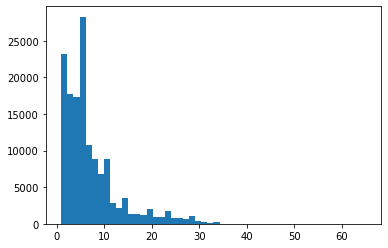

In [42]:
plt.hist([len(l) for l in x_train], bins=50)
plt.show()

In [43]:
x_train = pad_sequences(x_train, maxlen=50)
x_test = pad_sequences(x_test, maxlen=50)

In [44]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 284,   7, 100,  12, 426])

## LSTM으로 네이버 영화 리뷰 감성 분류하기

In [ ]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.

vocab_size = total_cnt - rare_cnt + 2  # 0번 패딩 토큰을 고려하여 + 1, OOV 토큰을 고려하여 +1
vocab_size

In [45]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

In [ ]:
loaded_model = load_model('naver_best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

## GRU으로 네이버 영화 리뷰 감성 분류하기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

## 리뷰 예측해보기

In [ ]:
def remove_stwords_oneletter(doc):
    doc = mecab.morphs(doc)
    doc = [t for t in doc if t not in st_list]
    doc = [t for t in doc if len(t) > 1]
    doc = ' '.join(doc)
    return doc

In [ ]:
def sentiment_predict(model, new_sentence):
    new_sentence = remove_stwords_oneletter(new_sentence)
    # print(new_sentence)
    encoded = tokenizer.texts_to_sequences([new_sentence])
    # print(encoded)
    pad_new = pad_sequences(encoded, maxlen=30)
    score = model.predict(pad_new)
    # return score
    if(score > 0.5):
        print('긍정리뷰입니다 : 긍정점수는 {}입니다'.format(score))
    else:
        print('부정리뷰입니다 : 긍정점수는 {}입니다'.format(score))

In [ ]:
sentiment_predict(model, '이 영화 배우들의 연기가 압권이에요')

In [ ]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in st_lists] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(loaded_model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')